In [2]:
import os

import matplotlib
import torch
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import os

# Set Kaggle API credentials as environment variables
os.environ["KAGGLE_USERNAME"] = "tedli927"
os.environ["KAGGLE_KEY"] = "8409787ddcd6fb1cfe8416403b15138e"

# Just so we can make sure we can import kaggle library without any errors
import kaggle



In [4]:
from pathlib import Path
import kaggle

# Define the directory where you want to save the dataset
dir_download = Path("data")

# Check if the directory exists
if not dir_download.exists():
    # If the directory doesn't exist, download the dataset
    kaggle.api.dataset_download_files(
        "akash2907/bird-species-classification", path=dir_download, unzip=True
    )
else:
    # If the directory already exists, print a message indicating that the dataset is already downloaded
    print("Dataset is already downloaded. Skipping download process.")

Dataset is already downloaded. Skipping download process.


In [5]:
import os
import shutil
from pathlib import Path


# Define the parent directory path
parent_directory = Path("data/")


# Define the source directories
source_directories = [
   parent_directory / "train_data" / "train_data",
   parent_directory / "test_data" / "test_data",
]


# Iterate over the source directories
for source_directory in source_directories:
   # Check if the source path exists
   if not source_directory.is_dir():
       print(f"Source path does not exist: {source_directory}")
       continue


   # Get the list of subdirectories in the source directory
   subdirectories = [
       subdir
       for subdir in os.listdir(source_directory)
       if os.path.isdir(source_directory / subdir)
   ]


   # Move the subdirectories to the destination directory
   for subdirectory in subdirectories:
       source = source_directory / subdirectory
       destination = parent_directory / subdirectory
       print(f"Moving {source} to {destination}")
       shutil.move(str(source), str(destination))


# Define the directories to be removed
directories_to_remove = [
   parent_directory / "train_data",
   parent_directory / "test_data",
]


# Remove the directories and all their contents
for directory in directories_to_remove:
   try:
       print(f"Removing directory and all its contents: {directory}")
       shutil.rmtree(directory)
   except OSError as e:
       print(f"Error: {directory} : {e.strerror}")



Source path does not exist: data/train_data/train_data
Source path does not exist: data/test_data/test_data
Removing directory and all its contents: data/train_data
Error: data/train_data : No such file or directory
Removing directory and all its contents: data/test_data
Error: data/test_data : No such file or directory


In [6]:
import os

"""
Function walks through a directory returning its contents
    prints out number of sub-directories, number if images in each subdirectory, name of each subdirectory
"""

def walk_through_dir(dir_path):
    
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(Path("data"))


There are 16 directories and 0 images in 'data'.
There are 1 directories and 6 images in 'data/bonegl'.
There are 0 directories and 7 images in 'data/bonegl/bonegl'.
There are 1 directories and 6 images in 'data/mgprob'.
There are 0 directories and 7 images in 'data/mgprob/mgprob'.
There are 1 directories and 10 images in 'data/hilpig'.
There are 0 directories and 10 images in 'data/hilpig/hilpig'.
There are 1 directories and 20 images in 'data/himgri'.
There are 0 directories and 20 images in 'data/himgri/himgri'.
There are 1 directories and 6 images in 'data/lbicrw'.
There are 0 directories and 6 images in 'data/lbicrw/lbicrw'.
There are 1 directories and 6 images in 'data/gretit'.
There are 0 directories and 7 images in 'data/gretit/gretit'.
There are 1 directories and 15 images in 'data/blasti'.
There are 0 directories and 15 images in 'data/blasti/blasti'.
There are 1 directories and 7 images in 'data/cbrtsh'.
There are 0 directories and 7 images in 'data/cbrtsh/cbrtsh'.
There are

Random image path: data/himgri/IMG_5463.JPG
Image class: himgri
Image height: 3456
Image width: 5184


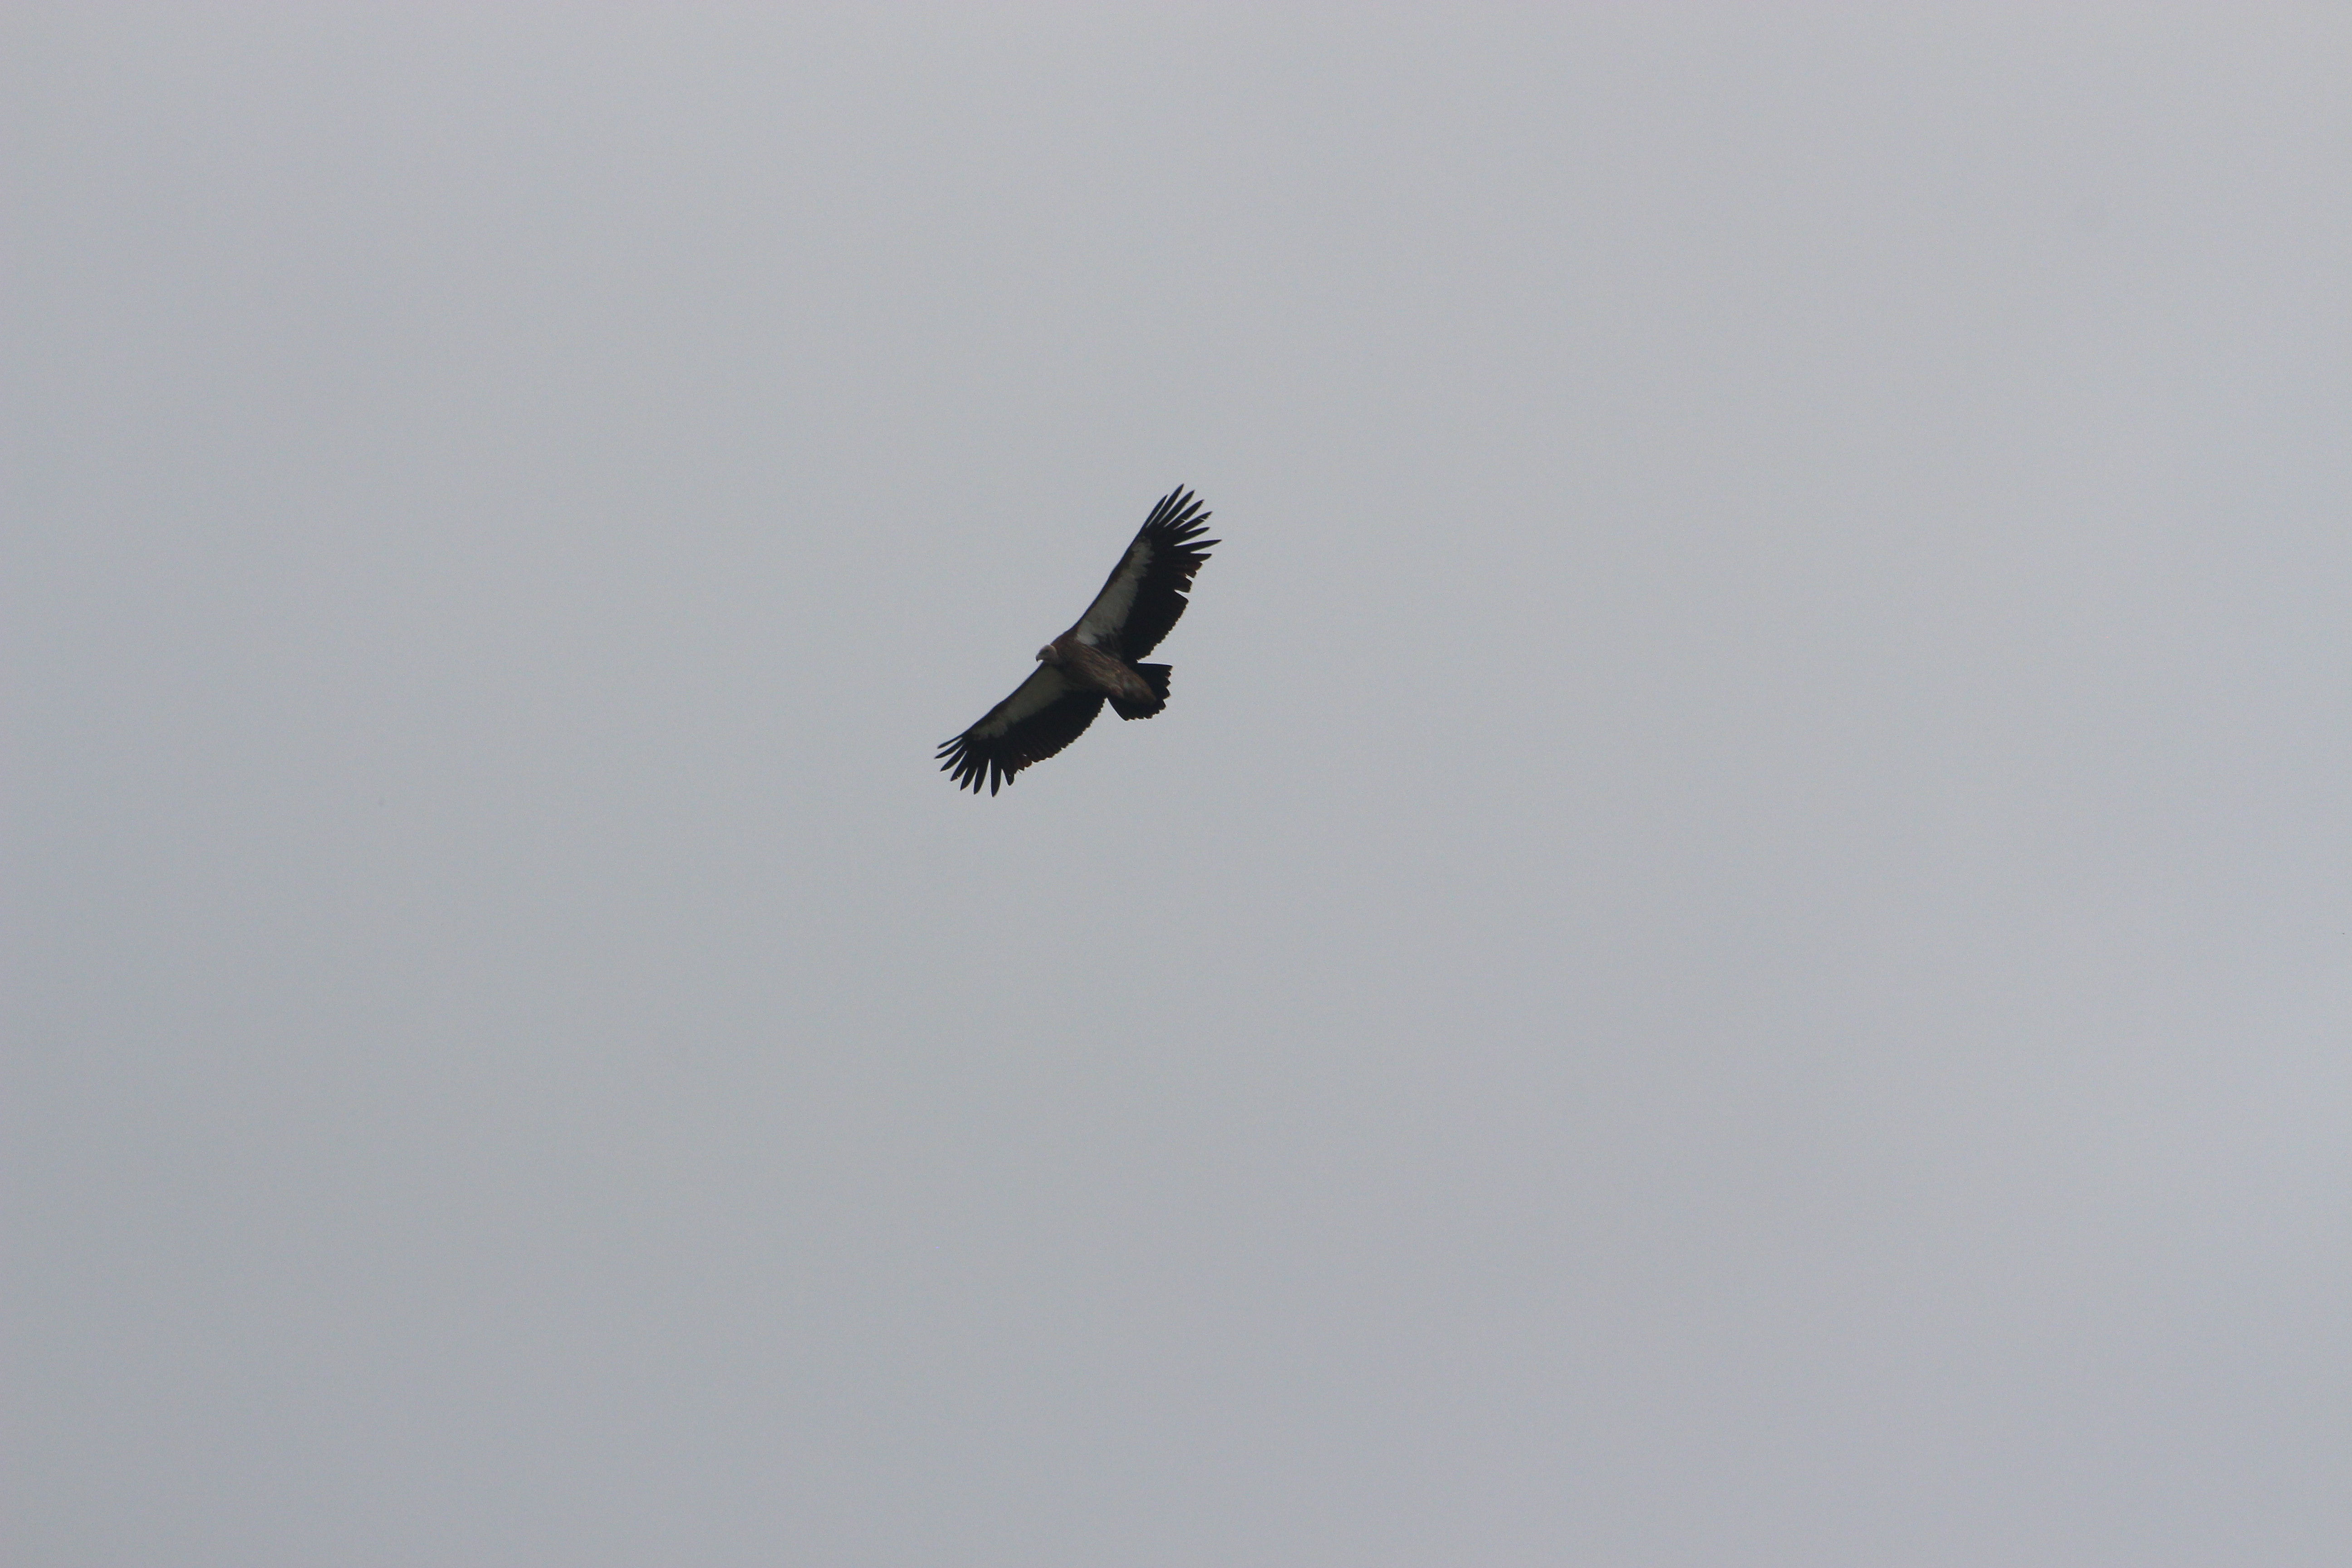

In [7]:
# Visualizing an image
import random
from PIL import Image
import os
from IPython.display import Image as IPImage, display

# Set seed
random.seed(42)  # <- try changing this and see what happens

#directory_path = "/root/dev/notebooks/pyTorch_repo/pyTorch/bird_classification/data/train"
directory_path = Path("data/")
subdirectories = [
    subdir
    for subdir in os.listdir(directory_path)
    if os.path.isdir(os.path.join(directory_path, subdir))
]

# Check if there are any subdirectories
if not subdirectories:
    print("No subdirectories found in the directory.")
else:
    # Choose a random subdirectory
    random_subdirectory = random.choice(subdirectories)

    # Get the full path of the chosen subdirectory
    subdirectory_path = os.path.join(directory_path, random_subdirectory)

    # Get a list of all image files in the chosen subdirectory
    image_files = [
        filename
        for filename in os.listdir(subdirectory_path)
    ]

    # Check if there are any image files in the subdirectory
    if not image_files:
        print(f"No image files found in the subdirectory: {random_subdirectory}")
    else:
        # Choose a random image file
        random_image_file = random.choice(image_files)

        # Get the full path of the chosen image file
        image_path = os.path.join(subdirectory_path, random_image_file)

        # Open and display the image
        img = Image.open(image_path)

        # 4. Print metadata
        print(f"Random image path: {image_path}")
        print(f"Image class: {random_subdirectory}")
        print(f"Image height: {img.height}")
        print(f"Image width: {img.width}")
        display(IPImage(image_path))

#os.chdir("/Users/theod/pyTorch_repo")

In [89]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])




In [90]:
# 1. Load and transform data
from torchvision import datasets
data_transformed = datasets.ImageFolder(root=Path("data/"), transform=data_transform)
#test_data_simple = datasets.ImageFolder(root=test_dir, transform=data_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's

# Assuming you have already defined the data_transform and loaded the data into the d variable

# Split the data into training and testing sets
# Assuming you have the original dataset 'd' and want to split it into 80% for training and 20% for testing
train_size = int(0.8 * len(data_transformed))
test_size = len(data_transformed) - train_size

# Split the dataset into training and testing sets
train_data, test_data = torch.utils.data.random_split(data_transformed, [train_size, test_size])
# Create the data loaders
train_dataloader_simple = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=NUM_WORKERS)

# train_dataloader_simple = DataLoader(train_data_simple, 
#                                      batch_size=BATCH_SIZE, 
#                                      shuffle=True, 
#                                      num_workers=NUM_WORKERS)

# test_dataloader_simple = DataLoader(test_data_simple, 
#                                     batch_size=BATCH_SIZE, 
#                                     shuffle=False, 
#                                     num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 20 workers.


(<torch.utils.data.dataloader.DataLoader at 0x16406a00940>,
 <torch.utils.data.dataloader.DataLoader at 0x16406a007f0>)

In [91]:
from matplotlib import pyplot as plt


def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    
    #directory_path = "/Users/ukz/pyTorch_repo/pyTorch_repo/pyTorch/bird_classification/train_data/train_data"
    subdirectories = [subdir for subdir in os.listdir(image_paths) if os.path.isdir(os.path.join(image_paths, subdir))]

    for i in range(n):
        # Choose a random subdirectory
        random_subdirectory = random.choice(subdirectories)
        print(random_subdirectory)
        # Get the full path of the chosen subdirectory
        subdirectory_path = os.path.join(image_paths, random_subdirectory)

        # Get a list of all image files in the chosen subdirectory
        image_files = [filename for filename in os.listdir(subdirectory_path) if filename.endswith('.jpg') or filename.endswith('.JPG')]
        
        # Choose a random image file
        random_image_file = random.choice(image_files)

        # Get the full path of the chosen image file
        image_path = os.path.join(subdirectory_path, random_image_file)

        # Open and display the image
        with Image.open(image_path) as f: 
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {random_subdirectory}", fontsize=16)

        





cbrtsh
himgri
himbul


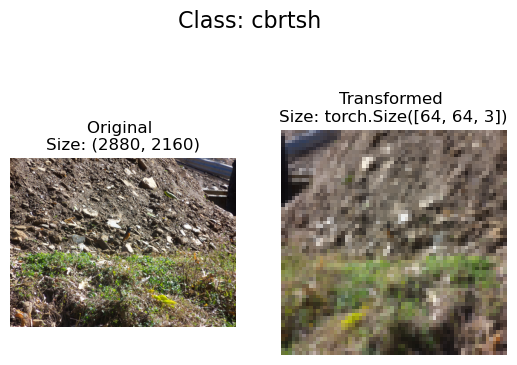

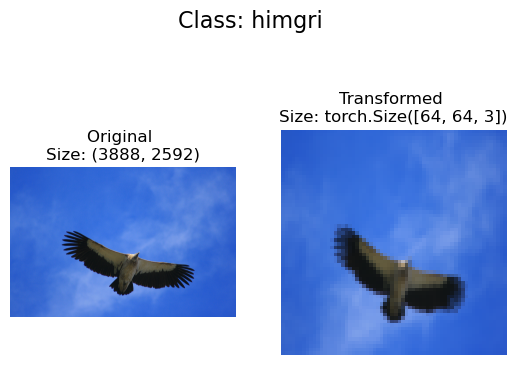

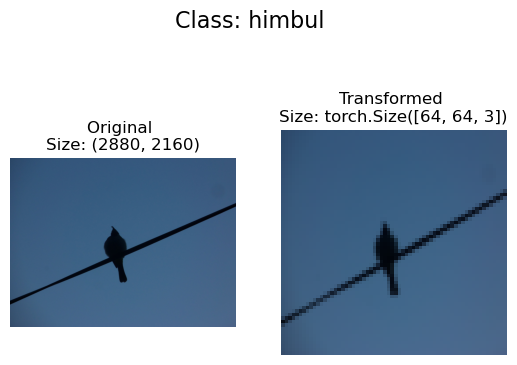

In [94]:
import pdb

#directory_path = "/root/dev/notebooks/pyTorch_repo/pyTorch/bird_classification/data"
directory_path = "C:/Users/theod/pyTorch_repo/pyTorch/bird_classification/data"

plot_transformed_images(directory_path, 
                        transform=data_transform, 
                        n=3
                        )

In [95]:
# Get class names as a list
class_names = data_transformed.classes
print(class_names)
# Can also get class names as a dict
class_dict = data_transformed.class_to_idx
print(class_dict)
print(len(train_dataloader_simple), len(test_dataloader_simple))

['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}
8 2


In [96]:
img, label = data_transformed[0][0], data_transformed[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.5216, 0.4510, 0.3490,  ..., 0.3490, 0.3412, 0.3451],
         [0.5020, 0.4431, 0.3294,  ..., 0.2824, 0.2784, 0.2863],
         [0.4941, 0.4235, 0.3569,  ..., 0.2706, 0.2471, 0.2549],
         ...,
         [0.2745, 0.2902, 0.3059,  ..., 0.3137, 0.3216, 0.3137],
         [0.2549, 0.2745, 0.2902,  ..., 0.2902, 0.3373, 0.3294],
         [0.2549, 0.2627, 0.2745,  ..., 0.3294, 0.4039, 0.3686]],

        [[0.3804, 0.3333, 0.2745,  ..., 0.2824, 0.2706, 0.2667],
         [0.3686, 0.3294, 0.2627,  ..., 0.2549, 0.2392, 0.2392],
         [0.3608, 0.3176, 0.2824,  ..., 0.2510, 0.2235, 0.2275],
         ...,
         [0.2235, 0.2353, 0.2392,  ..., 0.2588, 0.2627, 0.2510],
         [0.2000, 0.2118, 0.2157,  ..., 0.2392, 0.2667, 0.2588],
         [0.2118, 0.2157, 0.2275,  ..., 0.2667, 0.3216, 0.2941]],

        [[0.2549, 0.2353, 0.2157,  ..., 0.1961, 0.1882, 0.1843],
         [0.2510, 0.2353, 0.2118,  ..., 0.1882, 0.1765, 0.1765],
         [0.2510, 0.2314, 0.2235,  ..., 0.18

In [98]:
# 1. Take in a Dataset as well as a list of class names
from typing import List


def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

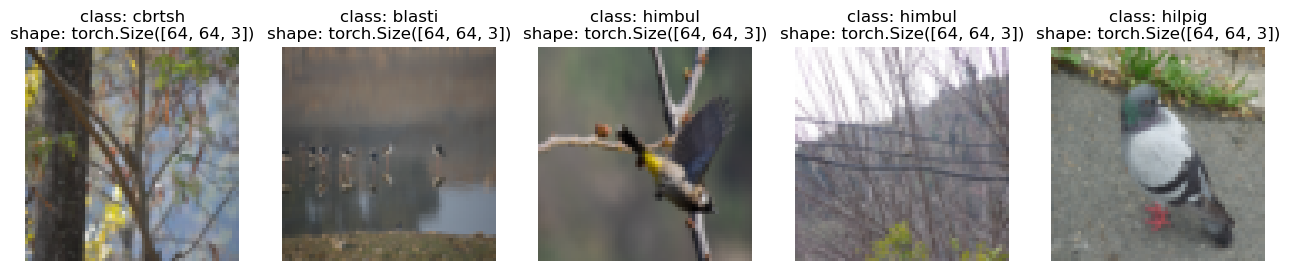

In [15]:
display_random_images(data_transformed, class_names, n=5, seed=42)

In [99]:
from typing import Dict, Tuple


def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [100]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
import pathlib
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [101]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [102]:
from torch import nn
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(data_transformed.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=16, bias=True)
  )
)

In [103]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    %pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 16]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [104]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [105]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [106]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [107]:
# Set random seeds
torch.manual_seed(42) 

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(data_transformed.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.003)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:38<02:33, 38.27s/it]

Epoch: 1 | train_loss: 2.7910 | train_acc: 0.1114 | test_loss: 2.7676 | test_acc: 0.0979


 40%|████      | 2/5 [01:05<01:35, 31.94s/it]

Epoch: 2 | train_loss: 2.6901 | train_acc: 0.1328 | test_loss: 2.7499 | test_acc: 0.0979


 60%|██████    | 3/5 [01:33<00:59, 29.80s/it]

Epoch: 3 | train_loss: 2.6931 | train_acc: 0.1390 | test_loss: 2.7709 | test_acc: 0.0979


 80%|████████  | 4/5 [02:07<00:31, 31.71s/it]

Epoch: 4 | train_loss: 2.6855 | train_acc: 0.1390 | test_loss: 2.7477 | test_acc: 0.0979


100%|██████████| 5/5 [02:35<00:00, 31.10s/it]

Epoch: 5 | train_loss: 2.6778 | train_acc: 0.1390 | test_loss: 2.7454 | test_acc: 0.0979
Total training time: 155.492 seconds


In [ ]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

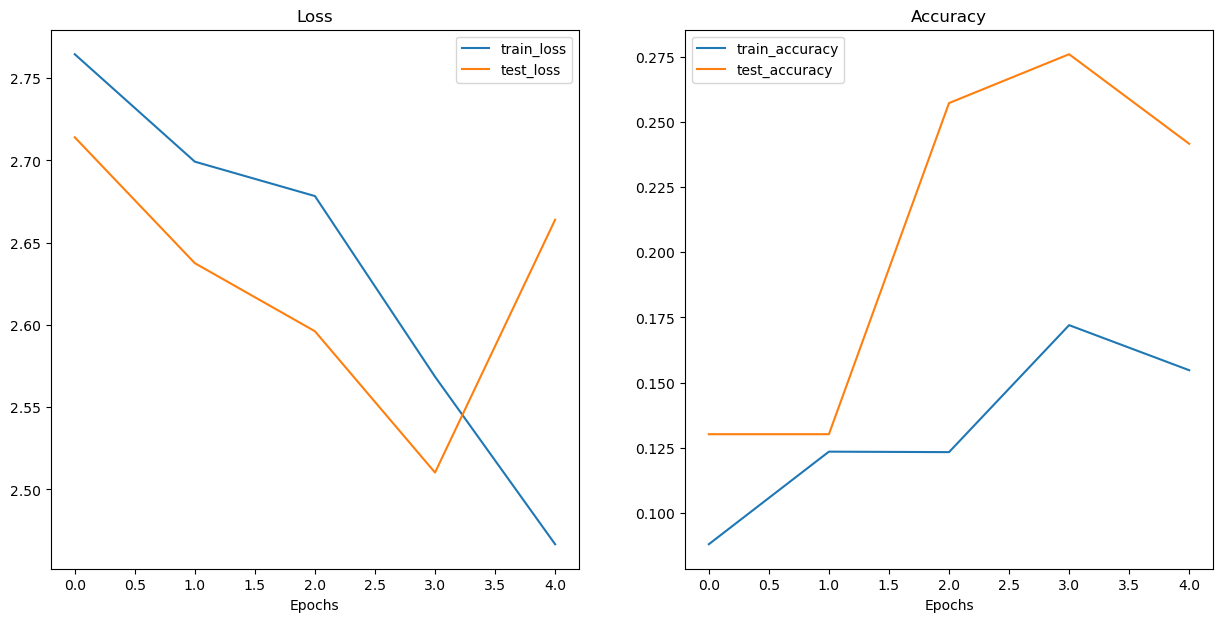

In [25]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(model_0_results)

In [69]:
from torchvision import transforms

# Manually create a series of transforms to preprocess the images
manual_transforms = transforms.Compose(
    [
       transforms.Resize(256),  # Resize the shorter side to 256 pixels, maintaining aspect ratio
        transforms.CenterCrop(224),  # Center crop the image to 224x224 pixels
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  # Mean values for normalization
            std=[0.229, 0.224, 0.225],  # Standard deviation values for normalization
        ),
    ]
)


data_transformed = datasets.ImageFolder(root=Path("data/"), transform=manual_transforms)
train_size = int(0.8 * len(data_transformed))
test_size = len(data_transformed) - train_size

train_data, test_data = torch.utils.data.random_split(
    data_transformed, [train_size, test_size]
)
# Create the data loaders
train_dataloader_simple = DataLoader(
    train_data, batch_size=32, shuffle=True, num_workers=NUM_WORKERS
)
test_dataloader_simple = DataLoader(
    test_data, batch_size=32, shuffle=False, num_workers=NUM_WORKERS
)

class_names = data_transformed.classes
print(class_names)
print(manual_transforms)

for images, labels in train_dataloader_simple:
    print("Batch of images shape:", images.shape)
    print("Batch of labels shape:", labels.shape)
    break 

['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels shape: torch.Size([32])


In [44]:
#Auto create transform
import torchvision

weights = torchvision.models.VGG16_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

In [70]:
#Setting up the pretrained model
vgg16_model = torchvision.models.vgg16(weights=weights).to(device)


In [71]:
#Freezing the feature layers
for param in vgg16_model.features.parameters():
    param.requires_grad = False
    

In [72]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
vgg16_model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.3, inplace=True),
    torch.nn.Linear(
        in_features=25088,
        out_features=output_shape,  # same number of output units as our number of classes
        bias=True,
    ),
).to(device)

In [73]:
#Training the model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16_model.parameters(), lr=0.003)

In [74]:
# Print a summary using torchinfo (uncomment for actual output)
from torchinfo import summary
summary(model=vgg16_model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
VGG (VGG)                                [32, 3, 224, 224]    [32, 16]             --                   Partial
├─Sequential (features)                  [32, 3, 224, 224]    [32, 512, 7, 7]      --                   False
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 64, 224, 224]   (1,792)              False
│    └─ReLU (1)                          [32, 64, 224, 224]   [32, 64, 224, 224]   --                   --
│    └─Conv2d (2)                        [32, 64, 224, 224]   [32, 64, 224, 224]   (36,928)             False
│    └─ReLU (3)                          [32, 64, 224, 224]   [32, 64, 224, 224]   --                   --
│    └─MaxPool2d (4)                     [32, 64, 224, 224]   [32, 64, 112, 112]   --                   --
│    └─Conv2d (5)                        [32, 64, 112, 112]   [32, 128, 112, 112]  (73,856)             False
│    └─ReLU (

In [75]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from engine import model_steps as engine

# Start the timer
from timeit import default_timer as timer


start_time = timer()

# Setup training and save the results
results = engine.train(
    model=vgg16_model,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=5,
    device=device,
)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:50<03:23, 50.94s/it]

Epoch: 1 | train_loss: 4.6550 | train_acc: 0.3821 | test_loss: 2.9495 | test_acc: 0.6146


 40%|████      | 2/5 [02:09<03:21, 67.31s/it]

Epoch: 2 | train_loss: 1.0665 | train_acc: 0.8084 | test_loss: 2.9803 | test_acc: 0.6438


 60%|██████    | 3/5 [03:02<02:01, 60.68s/it]

Epoch: 3 | train_loss: 0.3410 | train_acc: 0.9472 | test_loss: 4.0483 | test_acc: 0.6604


 80%|████████  | 4/5 [04:12<01:04, 64.46s/it]

Epoch: 4 | train_loss: 0.5713 | train_acc: 0.9550 | test_loss: 2.9410 | test_acc: 0.7094


100%|██████████| 5/5 [05:07<00:00, 61.43s/it]

Epoch: 5 | train_loss: 0.2140 | train_acc: 0.9688 | test_loss: 3.9281 | test_acc: 0.6760
[INFO] Total training time: 307.136 seconds


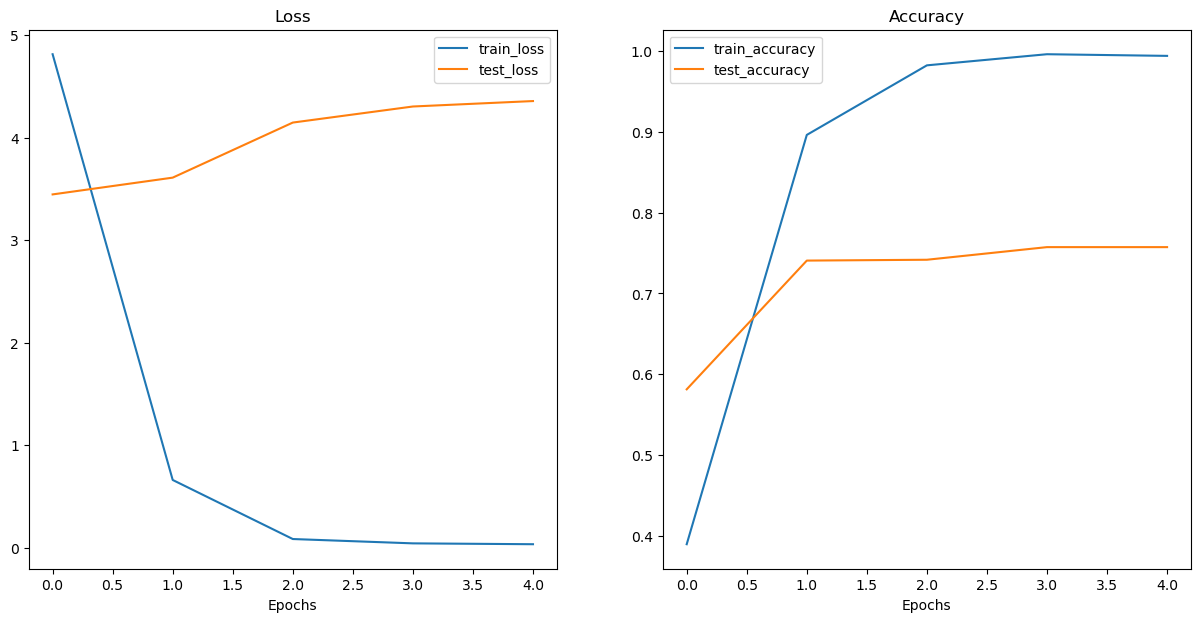

In [68]:
plot_loss_curves(results)